In [3]:
import string 
import re 
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [5]:
dataset = pd.read_csv(r"C:\Users\Abdullah\ISLR\Great Learning\Language Detection.csv")
dataset.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


# Split the data

In [9]:
X, y = dataset.iloc[:,0], dataset.iloc[:,1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Vectorizer & Pipeline

In [13]:
# ngram_range = words appear in sets of 1, 2 and 3
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

pipe_lr_r13 = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', linear_model.LogisticRegression())
])

# Model Fitting

In [14]:
pipe_lr_r13.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

# Model Prediction

In [15]:
y_pred = pipe_lr_r13.predict(X_test)

In [17]:
pipe_lr_r13.predict(["This is to inform you that you have a meeting scheduled today"])

array(['English'], dtype=object)

In [18]:
pipe_lr_r13.predict(["Buenas tardes"])

array(['Spanish'], dtype=object)

In [19]:
pipe_lr_r13.predict(["¿Cómo estás?"])

array(['Spanish'], dtype=object)

In [36]:
pipe_lr_r13.predict(["شکریہ"])

array(['Arabic'], dtype=object)

# Model Evaluation

In [20]:
acc = (metrics.accuracy_score(y_test, y_pred))*100
print(acc, '%')

98.25918762088975 %


In [21]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', matrix)

Confusion Matrix: 
 [[117   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  72   0   2   0   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0   1 103   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1 256   1   0   0   0   1   0   0   0   0   1   0   0   0]
 [  0   0   0   1 194   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   3   0   0 100   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 145   0   0   3   0   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 114   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 149   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 142   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   1   1 153

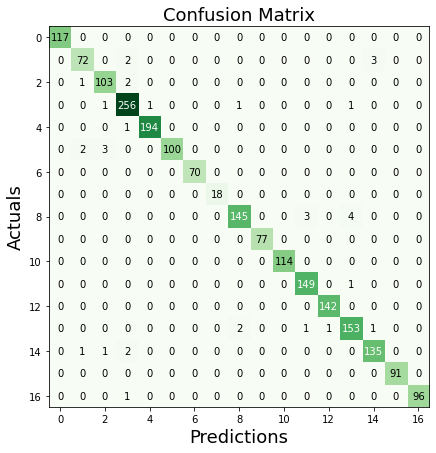

In [33]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(7, 7), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Model Saving

In [39]:
import pickle

lrFile = open('LRModel.pckl', 'wb')
pickle.dump(pipe_lr_r13, lrFile)
lrFile.close()

# Model Loading

In [41]:
global lrLangDetectModel

lrLangDetectFile = open('LRModel.pckl', 'rb')
lrLangDetectModel = pickle.load(lrLangDetectFile)
lrLangDetectFile.close()

# Call trained model & make predictions

In [50]:
def lang_detect(text):
    import numpy as np
    import string
    import re
    import pickle
    translate_table = dict((ord(char), None) for char in string.punctuation)
    
    global lrLangDetectModel
    lrLangDetectFile = open('LRModel.pckl', 'rb')
    lrLangDetectModel = pickle.load(lrLangDetectFile)
    lrLangDetectFile.close()
    
    text = " ".join(text.split())
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(translate_table)
    
    pred = lrLangDetectModel.predict([text])
    prob = lrLangDetectModel.predict_proba([text])
    
    return pred[0]

In [51]:
lang_detect("Sprechen Sie Englisch?")

'German'